## Gaussian process regression in F3DASM

Install guide:
https://bessagroup.github.io/F3DASM/

Import the packages needed.

In [71]:
import f3dasm
import numpy as np
import matplotlib.pyplot as plt

First, let's define our parameters.

In [72]:
dimensionality = 1

fun = f3dasm.functions.Ackley(
    dimensionality=dimensionality,
    scale_bounds=np.tile([0.0, 1.0], (dimensionality, 1)),
    )

Let's plot the function.

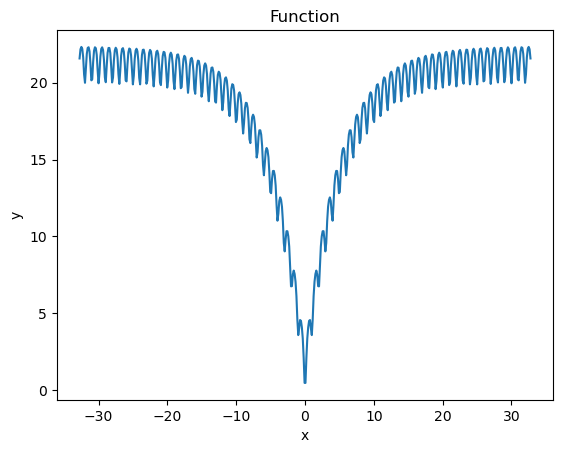

In [73]:
x_plot = np.linspace(fun.input_domain[0, 0], fun.input_domain[0, 1], 500)[:, None]
y_plot = fun(x_plot)
plt.plot(x_plot, y_plot)
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Add the design space, sampler and finally the training data.

In [74]:
parameter_DesignSpace: f3dasm.DesignSpace = f3dasm.make_nd_continuous_design(
    bounds=fun.input_domain.astype(float),
    dimensionality=dimensionality,
)

sampler = f3dasm.sampling.SobolSequenceSampling(design=parameter_DesignSpace)

train_data: f3dasm.Data = sampler.get_samples(numsamples=200)
train_data.add_output(output=fun(train_data))

Let's see how the training data looks like.

In [75]:
train_data.data

,input,output
,x0,y
0,-32.768,2.157031e+01
1,0.000,4.440892e-16
2,16.384,2.148902e+01
3,-16.384,2.148902e+01
4,-8.192,1.740427e+01
...,...,...
195,-15.104,1.953083e+01
196,-6.912,1.535680e+01
197,25.856,2.074977e+01


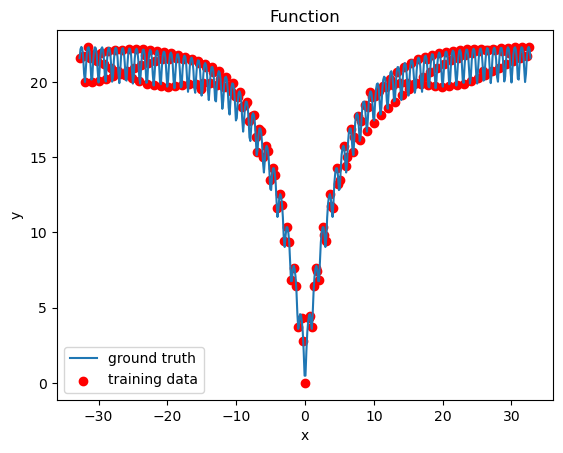

In [76]:
plt.plot(x_plot, y_plot, label='ground truth')
plt.scatter(train_data.data['input'], train_data.data['output'], c='r', label='training data')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Now, the fun part: regression

In [77]:
regressor = f3dasm.regression.gpr.Sogpr(
    train_data=train_data, 
    design=train_data.design,
)

surrogate = regressor.train()

Let's evaluate the mean and the variance of the Gaussian process object.

In [78]:
x_plot_data = f3dasm.Data(design=train_data.design)
x_plot_data.add_numpy_arrays(input=x_plot, output=x_plot)
mean, var = surrogate.predict(test_input_data=x_plot_data)

Let's see how our prediction looks like!

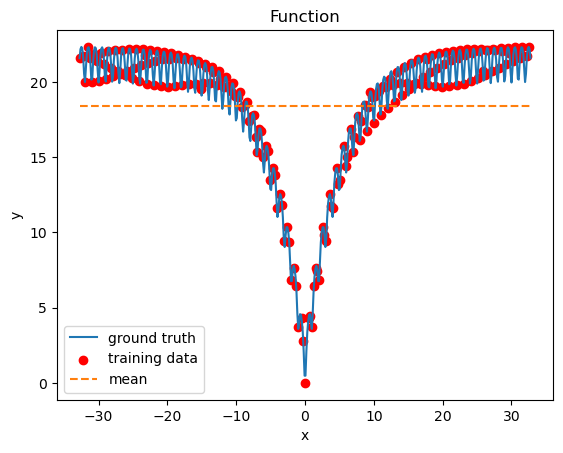

In [79]:
plt.plot(x_plot, y_plot, label='ground truth')
plt.scatter(train_data.data['input'], train_data.data['output'], c='r', label='training data')
plt.plot(x_plot, mean, '--', label='mean')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()